# Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import warnings
import os
import matplotlib.pyplot as plt
from arabic_text_normalization import text_normalization
tf.random.set_seed(1)

# Ignore Warnings

In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings(action='ignore')

# Read Data

In [3]:
Corpus = open('Stories.txt', encoding='utf8').read().split("\n")
Corpus = [text_normalization(text) for text in Corpus]

# Preprocessing Data For Deep Learning Model

In [4]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(Corpus)
all_words = len(tokenizer.word_index) + 1
all_words

10433

# Generate Input Sequences

In [5]:
input_sequence_ = []
for line in Corpus:
    token = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token)):
        n_grams = token[:i+1]
        input_sequence_.append(n_grams)
        
max_length =  max([len(x) for x in input_sequence_])
input_sequence_ = np.array(tf.keras.utils.pad_sequences(input_sequence_, maxlen= max_length, padding='pre'))

# Generate Train And Label Data For Model

In [6]:
train, label = input_sequence_[:,:-1], input_sequence_[:,-1]

# Convert Label Data

In [7]:
label = tf.keras.utils.to_categorical(label, num_classes=all_words)

# Deep Learning Models

In [8]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',
    patience=3,
    restore_best_weights=True,
)

**1-LSTM**

In [9]:
LSTM = tf.keras.Sequential([
                tf.keras.layers.Embedding(input_dim = all_words, output_dim=100, input_length=max_length-1),
                tf.keras.layers.LSTM(128, return_sequences=True),
                tf.keras.layers.LSTM(64, return_sequences=False),
                tf.keras.layers.Dense(all_words, activation= 'softmax')
                ])     

In [10]:
LSTM.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(), 
    optimizer=tf.keras.optimizers.legacy.Adam(), 
    metrics=['accuracy'])

In [11]:
with tf.device('gpu:0'):
    history = LSTM.fit(train, label, epochs=150, callbacks=[early_stop])

Epoch 1/150
1312/1312 [==============================] - 70s 51ms/step - loss: 8.1573 - accuracy: 0.0214
Epoch 2/150
1312/1312 [==============================] - 69s 53ms/step - loss: 7.6126 - accuracy: 0.0269
Epoch 3/150
1312/1312 [==============================] - 71s 54ms/step - loss: 7.3185 - accuracy: 0.0339
Epoch 4/150
1312/1312 [==============================] - 68s 52ms/step - loss: 7.0609 - accuracy: 0.0444
Epoch 5/150
1312/1312 [==============================] - 68s 52ms/step - loss: 6.8125 - accuracy: 0.0564
Epoch 6/150
1312/1312 [==============================] - 68s 52ms/step - loss: 6.5612 - accuracy: 0.0676
Epoch 7/150
1312/1312 [==============================] - 68s 52ms/step - loss: 6.3126 - accuracy: 0.0786
Epoch 8/150
1312/1312 [==============================] - 69s 53ms/step - loss: 6.0685 - accuracy: 0.0882
Epoch 9/150
1312/1312 [==============================] - 69s 53ms/step - loss: 5.8217 - accuracy: 0.0990
Epoch 10/150
1312/1312 [==============================]

In [12]:
accuracy = history.history['accuracy']
loss = history.history['loss']  

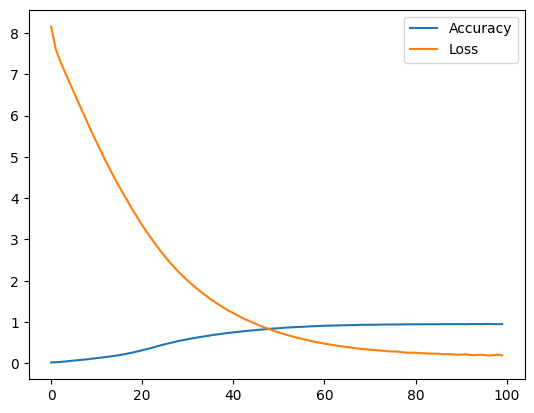

In [13]:
plt.plot(accuracy, label='Accuracy')
plt.plot(loss, label='Loss')
plt.legend()
plt.show()

**2-GRU**

In [14]:
GRU = tf.keras.Sequential([
                tf.keras.layers.Embedding(input_dim = all_words, output_dim=100, input_length=max_length-1),
                tf.keras.layers.GRU(128, return_sequences=False),
                tf.keras.layers.Dense(all_words, activation= 'softmax')
                ])   

In [15]:
GRU.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(), 
    optimizer=tf.keras.optimizers.legacy.Adam(), 
    metrics=['accuracy'])

In [16]:
with tf.device('gpu:0'):
    history = GRU.fit(train, label, epochs=150, callbacks=[early_stop])

Epoch 1/150
1312/1312 [==============================] - 69s 51ms/step - loss: 8.0816 - accuracy: 0.0246
Epoch 2/150
1312/1312 [==============================] - 61s 47ms/step - loss: 7.1094 - accuracy: 0.0516
Epoch 3/150
1312/1312 [==============================] - 61s 46ms/step - loss: 6.2876 - accuracy: 0.0853
Epoch 4/150
1312/1312 [==============================] - 63s 48ms/step - loss: 5.5032 - accuracy: 0.1160
Epoch 5/150
1312/1312 [==============================] - 64s 48ms/step - loss: 4.7679 - accuracy: 0.1590
Epoch 6/150
1312/1312 [==============================] - 75s 58ms/step - loss: 4.0858 - accuracy: 0.2357
Epoch 7/150
1312/1312 [==============================] - 67s 51ms/step - loss: 3.4671 - accuracy: 0.3315
Epoch 8/150
1312/1312 [==============================] - 61s 47ms/step - loss: 2.9053 - accuracy: 0.4328
Epoch 9/150
1312/1312 [==============================] - 62s 47ms/step - loss: 2.4216 - accuracy: 0.5197
Epoch 10/150
1312/1312 [==============================]

In [17]:
accuracy = history.history['accuracy']
loss = history.history['loss']  

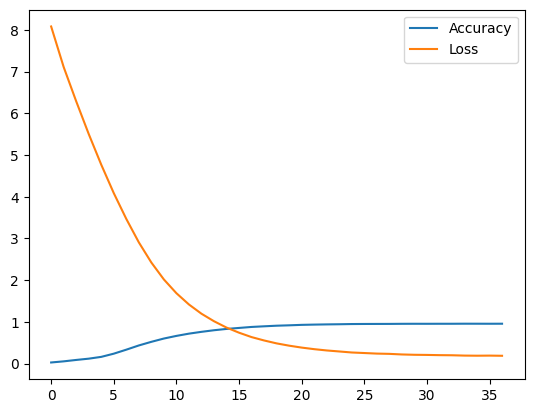

In [18]:
plt.plot(accuracy, label='Accuracy')
plt.plot(loss, label='Loss')
plt.legend()
plt.show()

**3-Bidirectional LSTM**

In [19]:
Bidirectional_LSTM = tf.keras.Sequential([
                tf.keras.layers.Embedding(input_dim = all_words, output_dim=100, input_length=max_length-1),
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=False)),
                tf.keras.layers.Dense(all_words, activation= 'softmax')
                ])   

In [20]:
Bidirectional_LSTM.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(), 
    optimizer=tf.keras.optimizers.legacy.Adam(), 
    metrics=['accuracy'])

In [21]:
with tf.device('gpu:0'):
    history = Bidirectional_LSTM.fit(train, label, epochs=150, callbacks=[early_stop])

Epoch 1/150
1312/1312 [==============================] - 89s 65ms/step - loss: 8.0649 - accuracy: 0.0247
Epoch 2/150
1312/1312 [==============================] - 87s 66ms/step - loss: 7.2499 - accuracy: 0.0452
Epoch 3/150
1312/1312 [==============================] - 85s 65ms/step - loss: 6.5360 - accuracy: 0.0736
Epoch 4/150
1312/1312 [==============================] - 85s 65ms/step - loss: 5.8692 - accuracy: 0.0992
Epoch 5/150
1312/1312 [==============================] - 85s 65ms/step - loss: 5.2312 - accuracy: 0.1286
Epoch 6/150
1312/1312 [==============================] - 85s 64ms/step - loss: 4.6230 - accuracy: 0.1755
Epoch 7/150
1312/1312 [==============================] - 87s 66ms/step - loss: 4.0551 - accuracy: 0.2465
Epoch 8/150
1312/1312 [==============================] - 86s 65ms/step - loss: 3.5214 - accuracy: 0.3330
Epoch 9/150
1312/1312 [==============================] - 90s 69ms/step - loss: 3.0303 - accuracy: 0.4198
Epoch 10/150
1312/1312 [==============================]

In [22]:
accuracy = history.history['accuracy']
loss = history.history['loss']  

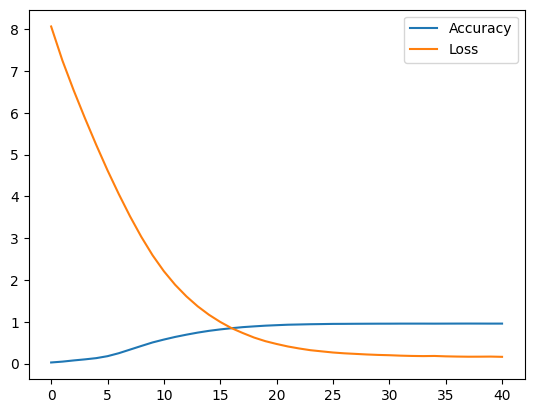

In [23]:
plt.plot(accuracy, label='Accuracy')
plt.plot(loss, label='Loss')
plt.legend()
plt.show()

# Predict Next Word

**1-LSTM**

In [38]:
text = ""
number_of_words = 12
for _ in range(number_of_words): 
    token_list = tokenizer.texts_to_sequences([text])[0] 
    token_list = tf.keras.utils.pad_sequences([token_list], maxlen=max_length-1, padding='pre') 
    predicted_probs = LSTM.predict(token_list, verbose=0) 
    word = tokenizer.index_word[np.argmax(predicted_probs)] 
    text += " " + word 
    print(text)
print(" ")
print("Full Generated Text:", text) 

 الْغَرِيبُ
 الْغَرِيبُ الْأَمِيرَةُ
 الْغَرِيبُ الْأَمِيرَةُ الثَّانِي
 الْغَرِيبُ الْأَمِيرَةُ الثَّانِي الْعَمْلَاقَ
 الْغَرِيبُ الْأَمِيرَةُ الثَّانِي الْعَمْلَاقَ الْأَوَّلَ
 الْغَرِيبُ الْأَمِيرَةُ الثَّانِي الْعَمْلَاقَ الْأَوَّلَ بِقُوَّةٍ
 الْغَرِيبُ الْأَمِيرَةُ الثَّانِي الْعَمْلَاقَ الْأَوَّلَ بِقُوَّةٍ فَقَامَ
 الْغَرِيبُ الْأَمِيرَةُ الثَّانِي الْعَمْلَاقَ الْأَوَّلَ بِقُوَّةٍ فَقَامَ الْأَوَّلُ
 الْغَرِيبُ الْأَمِيرَةُ الثَّانِي الْعَمْلَاقَ الْأَوَّلَ بِقُوَّةٍ فَقَامَ الْأَوَّلُ وَضَرَبَ
 الْغَرِيبُ الْأَمِيرَةُ الثَّانِي الْعَمْلَاقَ الْأَوَّلَ بِقُوَّةٍ فَقَامَ الْأَوَّلُ وَضَرَبَ الثَّانِي
 الْغَرِيبُ الْأَمِيرَةُ الثَّانِي الْعَمْلَاقَ الْأَوَّلَ بِقُوَّةٍ فَقَامَ الْأَوَّلُ وَضَرَبَ الثَّانِي بَقِي
 الْغَرِيبُ الْأَمِيرَةُ الثَّانِي الْعَمْلَاقَ الْأَوَّلَ بِقُوَّةٍ فَقَامَ الْأَوَّلُ وَضَرَبَ الثَّانِي بَقِي الْعِمْلَاقَانِ
 
Full Generated Text:  الْغَرِيبُ الْأَمِيرَةُ الثَّانِي الْعَمْلَاقَ الْأَوَّلَ بِقُوَّةٍ فَقَامَ الْأَوَّلُ وَضَرَبَ الثَّانِي بَقِي الْعِ

**2-GRU**

In [57]:
text = ""
number_of_words = 14
for _ in range(number_of_words): 
    token_list = tokenizer.texts_to_sequences([text])[0] 
    token_list = tf.keras.utils.pad_sequences([token_list], maxlen=max_length-1, padding='pre') 
    predicted_probs = GRU.predict(token_list, verbose=0) 
    word = tokenizer.index_word[np.argmax(predicted_probs)] 
    text += " " + word 
    print(text)
print(" ")
print("Full Generated Text:", text) 

 أَخَذَ
 أَخَذَ أَحْمدُ
 أَخَذَ أَحْمدُ الْبَقَرَةَ
 أَخَذَ أَحْمدُ الْبَقَرَةَ وَعَادَ
 أَخَذَ أَحْمدُ الْبَقَرَةَ وَعَادَ إِلَى
 أَخَذَ أَحْمدُ الْبَقَرَةَ وَعَادَ إِلَى الْبَيْتِ
 أَخَذَ أَحْمدُ الْبَقَرَةَ وَعَادَ إِلَى الْبَيْتِ ثُمَّ
 أَخَذَ أَحْمدُ الْبَقَرَةَ وَعَادَ إِلَى الْبَيْتِ ثُمَّ أَدْخَلَ
 أَخَذَ أَحْمدُ الْبَقَرَةَ وَعَادَ إِلَى الْبَيْتِ ثُمَّ أَدْخَلَ الْبَقَرَةَ
 أَخَذَ أَحْمدُ الْبَقَرَةَ وَعَادَ إِلَى الْبَيْتِ ثُمَّ أَدْخَلَ الْبَقَرَةَ إِلَى
 أَخَذَ أَحْمدُ الْبَقَرَةَ وَعَادَ إِلَى الْبَيْتِ ثُمَّ أَدْخَلَ الْبَقَرَةَ إِلَى الْحَظِيرَةِ
 أَخَذَ أَحْمدُ الْبَقَرَةَ وَعَادَ إِلَى الْبَيْتِ ثُمَّ أَدْخَلَ الْبَقَرَةَ إِلَى الْحَظِيرَةِ وَذَهَبَ
 أَخَذَ أَحْمدُ الْبَقَرَةَ وَعَادَ إِلَى الْبَيْتِ ثُمَّ أَدْخَلَ الْبَقَرَةَ إِلَى الْحَظِيرَةِ وَذَهَبَ إِلَى
 أَخَذَ أَحْمدُ الْبَقَرَةَ وَعَادَ إِلَى الْبَيْتِ ثُمَّ أَدْخَلَ الْبَقَرَةَ إِلَى الْحَظِيرَةِ وَذَهَبَ إِلَى أَبِيهِ
 
Full Generated Text:  أَخَذَ أَحْمدُ الْبَقَرَةَ وَعَادَ إِلَى الْبَيْتِ ثُمَّ أَدْخَلَ 

**3-Bidirectional LSTM**

In [40]:
text = ""
number_of_words = 12
for _ in range(number_of_words): 
    token_list = tokenizer.texts_to_sequences([text])[0] 
    token_list = tf.keras.utils.pad_sequences([token_list], maxlen=max_length-1, padding='pre') 
    predicted_probs = Bidirectional_LSTM.predict(token_list, verbose=0) 
    word = tokenizer.index_word[np.argmax(predicted_probs)] 
    text += " " + word 
    print(text)
print(" ")
print("Full Generated Text:", text) 

 الْأُمُّ
 الْأُمُّ اِبْنَهَا
 الْأُمُّ اِبْنَهَا سَافَرَ
 الْأُمُّ اِبْنَهَا سَافَرَ بَطَلُ
 الْأُمُّ اِبْنَهَا سَافَرَ بَطَلُ أَثِينَا
 الْأُمُّ اِبْنَهَا سَافَرَ بَطَلُ أَثِينَا إِلَى
 الْأُمُّ اِبْنَهَا سَافَرَ بَطَلُ أَثِينَا إِلَى مَدِينَةِ
 الْأُمُّ اِبْنَهَا سَافَرَ بَطَلُ أَثِينَا إِلَى مَدِينَةِ أَبِيهِ
 الْأُمُّ اِبْنَهَا سَافَرَ بَطَلُ أَثِينَا إِلَى مَدِينَةِ أَبِيهِ جَابَهَ
 الْأُمُّ اِبْنَهَا سَافَرَ بَطَلُ أَثِينَا إِلَى مَدِينَةِ أَبِيهِ جَابَهَ بَطَلُ
 الْأُمُّ اِبْنَهَا سَافَرَ بَطَلُ أَثِينَا إِلَى مَدِينَةِ أَبِيهِ جَابَهَ بَطَلُ أَثِينَا
 الْأُمُّ اِبْنَهَا سَافَرَ بَطَلُ أَثِينَا إِلَى مَدِينَةِ أَبِيهِ جَابَهَ بَطَلُ أَثِينَا الْكَثِيرَ
 
Full Generated Text:  الْأُمُّ اِبْنَهَا سَافَرَ بَطَلُ أَثِينَا إِلَى مَدِينَةِ أَبِيهِ جَابَهَ بَطَلُ أَثِينَا الْكَثِيرَ


# Save The Models

In [41]:
LSTM.save('Arabic_LSTM.h5')

In [42]:
Bidirectional_LSTM.save('Arabic_Bidirectional_LSTM.h5')

In [43]:
GRU.save('Arabic_GRU.h5')